## Step 1: Import Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

## Step 2: Loading Data

In [3]:
# Load the dataset
DATASET_COLUMNS  = ["sentiment", "ids", "date", "flag", "user", "text"]
DATASET_ENCODING = "ISO-8859-1"
data = pd.read_csv('../data/data.csv', encoding=DATASET_ENCODING , names=DATASET_COLUMNS)

## Assuming 'sentiment' is the label column

In [4]:
df = data.groupby('sentiment').apply(lambda x: x.sample(n=100000, random_state=42)).reset_index(drop=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_8304\938699969.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = data.groupby('sentiment').apply(lambda x: x.sample(n=100000, random_state=42)).reset_index(drop=True)


In [5]:
df = data.groupby('sentiment').apply(lambda x: x.sample(n=100000, random_state=42)).reset_index(drop=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_8304\938699969.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = data.groupby('sentiment').apply(lambda x: x.sample(n=100000, random_state=42)).reset_index(drop=True)


## Verify the counts

In [6]:
print(df['sentiment'].value_counts())  # Should print 100000 for each category

sentiment
0    100000
4    100000
Name: count, dtype: int64


## Step 3: Text Analysis

### Displaying top 5 rows

In [7]:
df.head()

sentiment         ids                          date      flag  \
0          0  1974671194  Sat May 30 13:36:31 PDT 2009  NO_QUERY   
1          0  1997882236  Mon Jun 01 17:37:11 PDT 2009  NO_QUERY   
2          0  2177756662  Mon Jun 15 06:39:05 PDT 2009  NO_QUERY   
3          0  2216838047  Wed Jun 17 20:02:12 PDT 2009  NO_QUERY   
4          0  1880666283  Fri May 22 02:03:31 PDT 2009  NO_QUERY   

             user                                               text  
0         simba98  @xnausikaax oh no! where did u order from? tha...  
1          Seve76  A great hard training weekend is over.  a coup...  
2  x__claireyy__x  Right, off to work  Only 5 hours to go until I...  
3          Balasi                    I am craving for japanese food   
4    djrickdawson  Jean Michel Jarre concert tomorrow  gotta work...

### Displaying buttom 5 rows

In [8]:
df.tail()

sentiment         ids                          date      flag  \
199995          4  1678756124  Sat May 02 07:38:13 PDT 2009  NO_QUERY   
199996          4  2070127756  Sun Jun 07 17:08:32 PDT 2009  NO_QUERY   
199997          4  1880450522  Fri May 22 01:17:10 PDT 2009  NO_QUERY   
199998          4  2002418448  Tue Jun 02 04:09:20 PDT 2009  NO_QUERY   
199999          4  1563885617  Mon Apr 20 00:43:06 PDT 2009  NO_QUERY   

                   user                                               text  
199995         llhinkle  @kimberlykeith Awww thanks  That made me feel ...  
199996     markdavidson  @callkathy I just started using this on my iPh...  
199997          thedamo  @tferriss Hi Tim, what are your thoughts of Bu...  
199998  patient_warrior  @pastorjpruitt We have authority over devils (...  
199999            NenyS  @greaggedeanman, the one with ''saving the wor...

df.rename(columns={'Review':'text','Sentiment':'status','Class Name':'topic'},inplace=True)

### Shape of the Data Set

In [9]:
s = df.shape
print("Total Number of Rows:",s[0])
print("Total Number of Columns:",s[1])

Total Number of Rows: 200000
Total Number of Columns: 6


### Information of the DataSet

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   sentiment  200000 non-null  int64 
 1   ids        200000 non-null  int64 
 2   date       200000 non-null  object
 3   flag       200000 non-null  object
 4   user       200000 non-null  object
 5   text       200000 non-null  object
dtypes: int64(2), object(4)
memory usage: 9.2+ MB


## Removing the unnecessary columns

In [11]:
df = df[['sentiment','text']]

In [12]:
df.head()

sentiment                                               text
0          0  @xnausikaax oh no! where did u order from? tha...
1          0  A great hard training weekend is over.  a coup...
2          0  Right, off to work  Only 5 hours to go until I...
3          0                    I am craving for japanese food 
4          0  Jean Michel Jarre concert tomorrow  gotta work...

## Replacing the values to ease understanding

In [13]:
df['sentiment'] = df['sentiment'].replace(4,1) ##we convert 4 → 1 to binary labels (0 and 1)
df.head()

sentiment                                               text
0          0  @xnausikaax oh no! where did u order from? tha...
1          0  A great hard training weekend is over.  a coup...
2          0  Right, off to work  Only 5 hours to go until I...
3          0                    I am craving for japanese food 
4          0  Jean Michel Jarre concert tomorrow  gotta work...

## Plotting the distribution for dataset

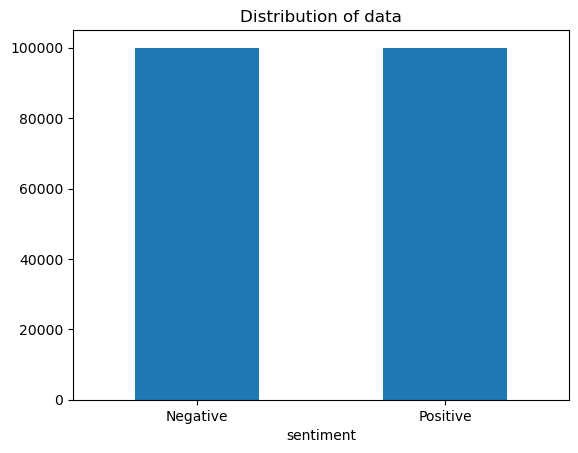

In [14]:
ax = df.groupby('sentiment').count().plot(kind='bar', title='Distribution of data',
                                               legend=False)
ax.set_xticklabels(['Negative','Positive',], rotation=0)

# Storing data in lists.
text, sentiment = list(df['text']), list(df['sentiment'])

### Each Row how many words count

In [15]:
df['word_count'] = df['text'].apply(lambda x: len(str(x).split(" ")))
df[['text','word_count']].head()
df.head()

sentiment                                               text  word_count
0          0  @xnausikaax oh no! where did u order from? tha...          11
1          0  A great hard training weekend is over.  a coup...          28
2          0  Right, off to work  Only 5 hours to go until I...          14
3          0                    I am craving for japanese food            7
4          0  Jean Michel Jarre concert tomorrow  gotta work...          12

### Each Row how many words count average

In [16]:
def avg_word(sentence):
    words = sentence.split()
    return (sum(len(word) for word in words)/len(words))

In [17]:
df['avg_word'] = df['text'].apply(lambda x: avg_word(str(x)))
df.head()

sentiment                                               text  word_count  \
0          0  @xnausikaax oh no! where did u order from? tha...          11   
1          0  A great hard training weekend is over.  a coup...          28   
2          0  Right, off to work  Only 5 hours to go until I...          14   
3          0                    I am craving for japanese food            7   
4          0  Jean Michel Jarre concert tomorrow  gotta work...          12   

   avg_word  
0  4.900000  
1  3.760000  
2  3.307692  
3  4.166667  
4  5.400000

### Each Row how many stopwords count

In [18]:
#used for stemming helps in reducing words to root form
import nltk 
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [19]:
from nltk.corpus import stopwords #list of common words( contains a variety of text datasets, including stopwords)
stop = stopwords.words('english')

In [20]:
df['stopwords'] = df['text'].apply(lambda x: len([x for x in str(x).split() if x in stop]))
df.head()

sentiment                                               text  word_count  \
0          0  @xnausikaax oh no! where did u order from? tha...          11   
1          0  A great hard training weekend is over.  a coup...          28   
2          0  Right, off to work  Only 5 hours to go until I...          14   
3          0                    I am craving for japanese food            7   
4          0  Jean Michel Jarre concert tomorrow  gotta work...          12   

   avg_word  stopwords  
0  4.900000          2  
1  3.760000         10  
2  3.307692          4  
3  4.166667          2  
4  5.400000          1

In [21]:
df['sentiment'].unique()

array([0, 1], dtype=int64)

### Distribution of the words

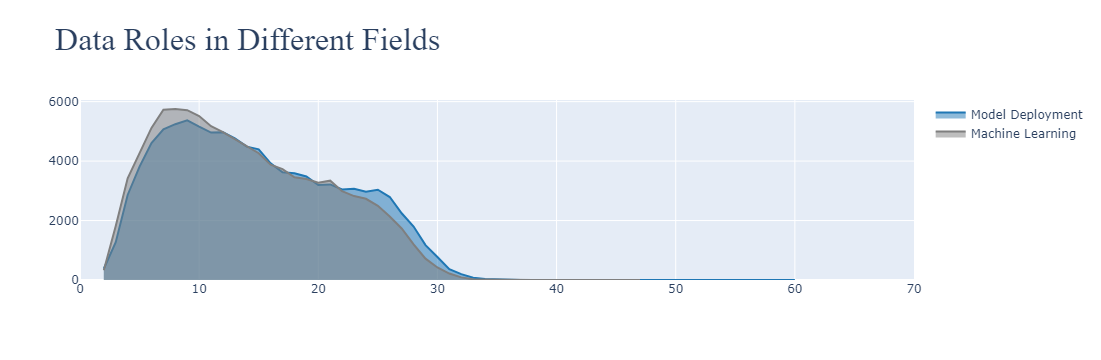

In [22]:
###shows the distribution of word counts for two sentiment categories:

#Python visualization library.
from plotly import graph_objs as go #contains objects like Figure and Scatter for plotting.


#Hex colors are defined for different sentiment categories.
primary_blue = '#1f77b4'  # Blue color for visualization
primary_grey = '#7f7f7f'  # Grey color for visualization

md_df = df[df['sentiment'] == 0]['word_count'].value_counts().sort_index()
ml_df = df[df['sentiment'] == 1]['word_count'].value_counts().sort_index()


fig = go.Figure()
fig.add_trace(go.Scatter(
    x=md_df.index, ## Word count values (x-axis)
    y=md_df.values,  # Frequency of each word count (y-axis)
    name='Model Deployment',
    fill='tozeroy', ## Fills area below the line
    marker_color=primary_blue,
))
fig.add_trace(go.Scatter(
    x=ml_df.index,
    y=ml_df.values,
    name='Machine Learning',
    fill='tozeroy',
    marker_color=primary_grey,
))


fig.update_layout(
    title='<span style="font-size:32px; font-family:Times New Roman">Data Roles in Different Fields</span>'
)
fig.update_xaxes(range=[0, 70])
fig.show()

## Step 4: Data Cleaning

### Text Cleaning unnecessary words

### Stop Words Removing

### Applying Stemming on the text column

### Appending all 3 functions into one function

In [23]:
##used in text preprocessing before sentiment analysis
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

## Download NLTK resources (if not already downloaded)

In [24]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## Define Stopwords

In [25]:
stop_words = set(stopwords.words('english'))
more_stopwords = ['u', 'im', 'c', 'a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from', 
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're',
             's', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those', 
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']
stop_words.update(more_stopwords)

## Define Lemmatizer

In [26]:
lemmatizer = WordNetLemmatizer()

## Define Emoji Dictionary

In [27]:
emojis = {':)': 'smile', ':-)': 'smile', ';d': 'wink', ':-E': 'vampire', ':(': 'sad', 
          ':-(': 'sad', ':-<': 'sad', ':P': 'raspberry', ':O': 'surprised',
          ':-@': 'shocked', ':@': 'shocked',':-$': 'confused', ':\\': 'annoyed', 
          ':#': 'mute', ':X': 'mute', ':^)': 'smile', ':-&': 'confused', '$_$': 'greedy',
          '@@': 'eyeroll', ':-!': 'confused', ':-D': 'smile', ':-0': 'yell', 'O.o': 'confused',
          '<(-_-)>': 'robot', 'd[-_-]b': 'dj', ":'-)": 'sadsmile', ';)': 'wink', 
          ';-)': 'wink', 'O:-)': 'angel','O*-)': 'angel','(:-D': 'gossip', '=^.^=': 'cat'}

## Define Regex Patterns

#### 1. URL pattern

#### 2. @username

#### 3. Non-alphanumeric characters

#### 4.  Repeated characters 

####dddddddddddddddddddddddddddd URL pattern

In [28]:

urlPattern = r"https?://\S+|www\.\S+"  # URL pattern
userPattern = r'@\w+'  # Mentions (@username)
alphaPattern = r"[^a-zA-Z0-9]"  # Non-alphanumeric characters
sequencePattern = r"(.)\1\1+"
seqReplacePattern = r"\1\1"  # Replace 3+ repeated letters with 2 (e.g., "loove")

In [29]:
# Define Text Cleaning Function
def clean_text(text):
    '''Convert text to lowercase, remove links, punctuation, emojis, and words with numbers.'''
    text = str(text).lower()
    text = re.sub(urlPattern, '', text)  # Replace URLs with "URL"
    text = re.sub(userPattern, '', text)  # Replace mentions with "USER"
    text = re.sub(r'\[.*?\]', '', text)  # Remove text in square brackets
    text = re.sub(r'<.*?>+', '', text)  # Remove HTML tags
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)  # Remove punctuation
    text = re.sub(r'\n', ' ', text)  # Remove newlines
    text = re.sub(r'\w*\d\w*', '', text)  # Remove words containing numbers
    
    # Replace emojis with text
    for emoji, meaning in emojis.items():
        text = text.replace(emoji, f" {meaning} ")

    # Replace 3+ repeated letters with 2 (e.g., "loooove" → "loove")
    text = re.sub(sequencePattern, seqReplacePattern, text)
    
    return text

In [30]:
# Define Stopword Removal Function
def remove_stopwords(text):
    return ' '.join(word for word in text.split() if word not in stop_words)

# Define Lemmatization Function
def lemmatize_text(text):
    return ' '.join(lemmatizer.lemmatize(word) for word in text.split())

# Define Full Preprocessing Pipeline
def preprocess_text(text):
    text = clean_text(text)  # Clean text
    text = remove_stopwords(text)  # Remove stopwords
    text = lemmatize_text(text)  # Apply lemmatization
    return text

In [31]:
import string
df['text_clean'] = df['text'].apply(preprocess_text)
df.head()

sentiment                                               text  word_count  \
0          0  @xnausikaax oh no! where did u order from? tha...          11   
1          0  A great hard training weekend is over.  a coup...          28   
2          0  Right, off to work  Only 5 hours to go until I...          14   
3          0                    I am craving for japanese food            7   
4          0  Jean Michel Jarre concert tomorrow  gotta work...          12   

   avg_word  stopwords                                         text_clean  
0  4.900000          2                            oh order thats horrible  
1  3.760000         10  great hard training weekend couple day rest le...  
2  3.307692          4                         right work hour go free xd  
3  4.166667          2                              craving japanese food  
4  5.400000          1  jean michel jarre concert tomorrow gotta work ...

### Applying LabelEncoder on the status column

In [32]:
df.head()

sentiment                                               text  word_count  \
0          0  @xnausikaax oh no! where did u order from? tha...          11   
1          0  A great hard training weekend is over.  a coup...          28   
2          0  Right, off to work  Only 5 hours to go until I...          14   
3          0                    I am craving for japanese food            7   
4          0  Jean Michel Jarre concert tomorrow  gotta work...          12   

   avg_word  stopwords                                         text_clean  
0  4.900000          2                            oh order thats horrible  
1  3.760000         10  great hard training weekend couple day rest le...  
2  3.307692          4                         right work hour go free xd  
3  4.166667          2                              craving japanese food  
4  5.400000          1  jean michel jarre concert tomorrow gotta work ...

### Plottting WordCount

In [33]:
neg_texts = [ text for index, text in enumerate(df['text_clean']) if df['sentiment'][index] == 0]
pos_texts = [ text for index, text in enumerate(df['text_clean']) if df['sentiment'][index] == 1]
neg_percent = len(neg_texts)*100/len(df['text_clean'])
pos_percent = len(pos_texts)*100/len(df['text_clean'])

### Displaying the percentage of neutral, positive and negative

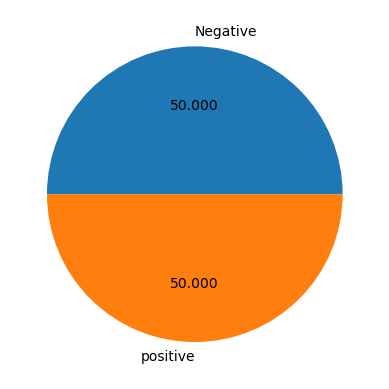

In [34]:
import matplotlib.pyplot as plt
percent_values = [neg_percent, pos_percent]
labels = 'Negative', 'positive'

plt.pie(percent_values, labels=labels, autopct='%3.3f')
plt.show()

In [35]:
df.head()

sentiment                                               text  word_count  \
0          0  @xnausikaax oh no! where did u order from? tha...          11   
1          0  A great hard training weekend is over.  a coup...          28   
2          0  Right, off to work  Only 5 hours to go until I...          14   
3          0                    I am craving for japanese food            7   
4          0  Jean Michel Jarre concert tomorrow  gotta work...          12   

   avg_word  stopwords                                         text_clean  
0  4.900000          2                            oh order thats horrible  
1  3.760000         10  great hard training weekend couple day rest le...  
2  3.307692          4                         right work hour go free xd  
3  4.166667          2                              craving japanese food  
4  5.400000          1  jean michel jarre concert tomorrow gotta work ...

### Common Words in worst

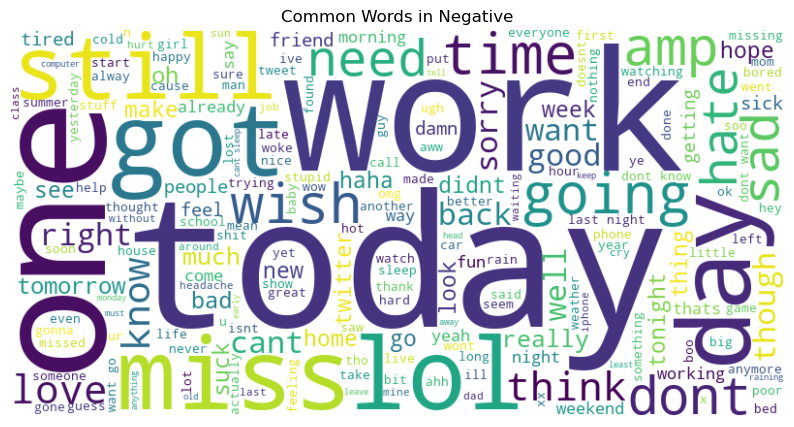

In [36]:
from wordcloud import WordCloud
spam_text = df[df['sentiment'] == 0]['text_clean'].str.cat(sep=' ')
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(spam_text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Common Words in Negative")
plt.show()

### Common Words in average

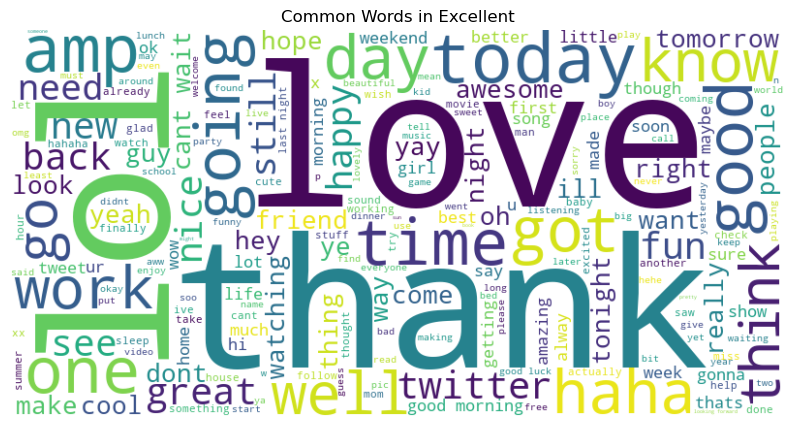

In [37]:
spam_text = df[df['sentiment'] == 1]['text_clean'].str.cat(sep=' ')
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(spam_text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Common Words in Excellent")
plt.show()

### Applying TF-IDF on data

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=500)  # Adjust max_features as needed

### Selecting Feature and Target

In [39]:
X = tfidf.fit_transform(df['text_clean']).toarray()
y = df['sentiment']

### Saving the TF-IDF

In [40]:
import pickle
with open("../model/tfidf_model.pkl", "wb") as file:
    pickle.dump(tfidf, file)

### Split into train and test sets

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
print('Number of Rows in X_train:',len(X_train))
print('Number of Rows in y_train:',len(y_train))
print('Number of Rows in X_test:',len(X_test))
print('Number of Rows in y_test:',len(y_test))

Number of Rows in X_train: 160000
Number of Rows in y_train: 160000
Number of Rows in X_test: 40000
Number of Rows in y_test: 40000


## Step 5: Algorithms Applying

### Extreme Gradient Boosting

In [43]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [44]:
# Instantiate the XGBoost Classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Fit the model to the training data
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_xgb = xgb_model.predict(X_test)



C:\Users\DELL\jupiter\Lib\site-packages\xgboost\core.py:158: UserWarning:

[23:48:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




In [45]:
from sklearn.metrics import accuracy_score
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Accuracy: {xgb_accuracy}")

XGBoost Accuracy: 0.72145


### Saving the Model

In [46]:
with open("../model/xgb_model.sav", "wb") as file:
    pickle.dump(xgb_model, file)

### Evaluating XG Boost

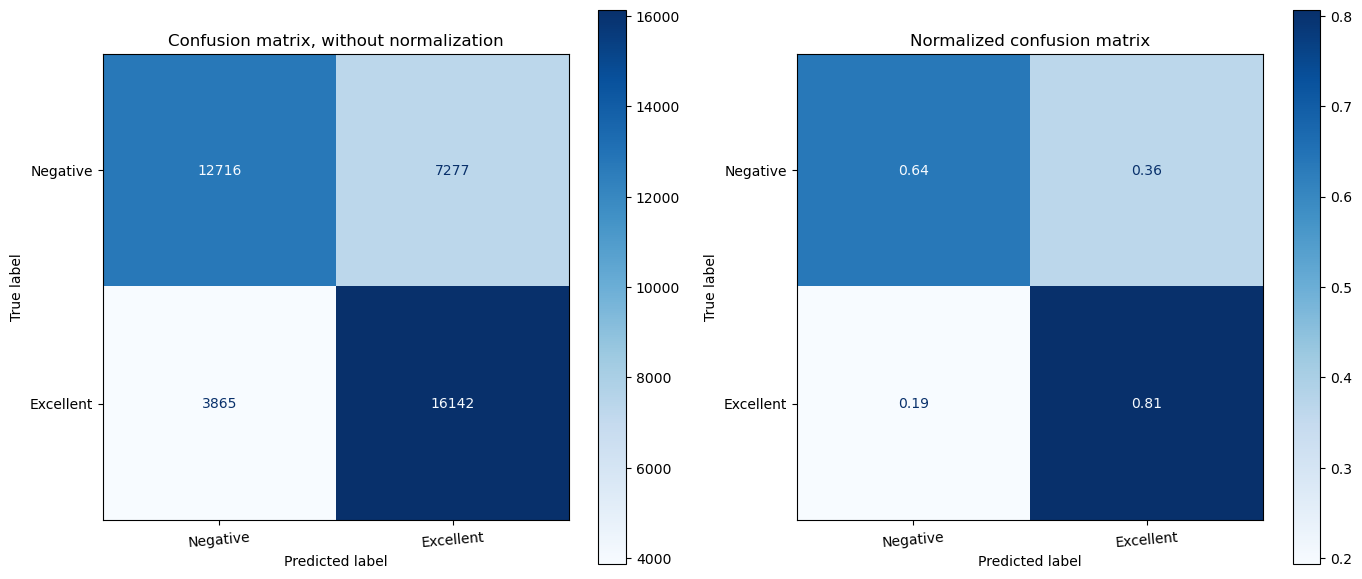


Classification Report:

              precision    recall  f1-score   support

           0       0.77      0.64      0.70     19993
           1       0.69      0.81      0.74     20007

    accuracy                           0.72     40000
   macro avg       0.73      0.72      0.72     40000
weighted avg       0.73      0.72      0.72     40000



In [47]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

# Example placeholders for model and data (Replace these with actual data/model)
class_names = ['Negative', 'Excellent']


# Create subplots for confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

title_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true")
]

# Iterate and plot confusion matrices
for ax, (title, normalize) in zip(axes, title_options):
    if xgb_model and X_test is not None and y_test is not None:  # Safeguard for actual data usage
        display = ConfusionMatrixDisplay.from_estimator(
            xgb_model,
            X_test,
            y_test,
            display_labels=class_names,
            xticks_rotation=5,
            cmap=plt.cm.Blues,
            normalize=normalize,
            ax=ax,
        )
        ax.set_title(title)

plt.tight_layout()
plt.show()

# Print classification report (example safeguard)
if y_test is not None and y_pred_xgb is not None:
    print("\n\033[1mClassification Report:\033[0m\n")
    print(classification_report(y_test, y_pred_xgb))
else:
    print("Provide valid test labels and predictions for classification report.")


### Applying the AdaBoost

In [48]:
from sklearn.ensemble import AdaBoostClassifier ## combines multiple weak classifiers into a strong one.
from sklearn.tree import DecisionTreeClassifier

In [49]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Instantiate the AdaBoost Classifier with a base estimator
adaboost_model = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=3),  # Use 'estimator' instead of 'base_estimator'
    n_estimators=20,  # Number of weak learners
    learning_rate=0.1, # Learning rate
    random_state=42
)

# Fit the model to the training data
adaboost_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_adaboost = adaboost_model.predict(X_test)

# Evaluate accuracy
adaboost_accuracy = accuracy_score(y_test, y_pred_adaboost)  #comparing predicted labels with actual test labels.
print(f"AdaBoost Accuracy: {adaboost_accuracy}")


C:\Users\DELL\jupiter\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



AdaBoost Accuracy: 0.6327


### Saving the Adaboost Model

In [50]:
with open("../model/adaboost_model.sav", "wb") as file:
    pickle.dump(adaboost_model, file)

### Evaluating Adaboost

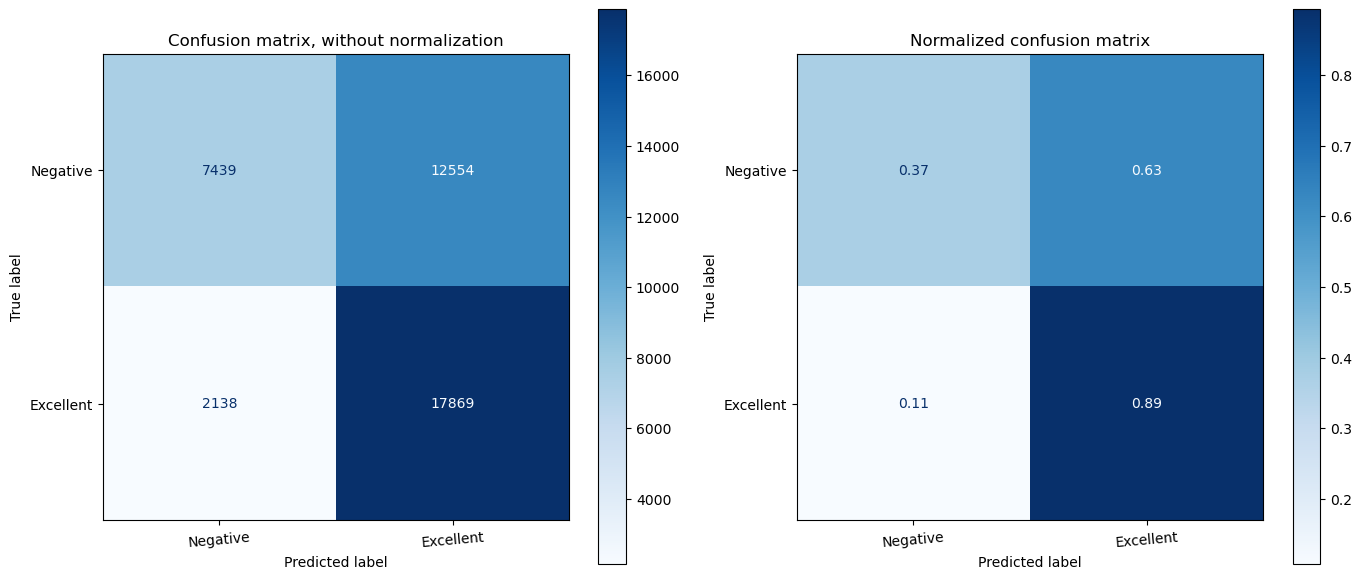


Classification Report:

              precision    recall  f1-score   support

           0       0.78      0.37      0.50     19993
           1       0.59      0.89      0.71     20007

    accuracy                           0.63     40000
   macro avg       0.68      0.63      0.61     40000
weighted avg       0.68      0.63      0.61     40000



In [51]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

# Example placeholders for model and data (Replace these with actual data/model)
class_names = ['Negative', 'Excellent']


# Create subplots for confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

title_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true")
]

# Iterate and plot confusion matrices
for ax, (title, normalize) in zip(axes, title_options):
    if adaboost_model and X_test is not None and y_test is not None:  # Safeguard for actual data usage
        display = ConfusionMatrixDisplay.from_estimator(
            adaboost_model,
            X_test,
            y_test,
            display_labels=class_names,
            xticks_rotation=5,
            cmap=plt.cm.Blues,
            normalize=normalize,
            ax=ax,
        )
        ax.set_title(title)

plt.tight_layout()
plt.show()

# Print classification report (example safeguard)
if y_test is not None and y_pred_adaboost is not None:
    print("\n\033[1mClassification Report:\033[0m\n")
    print(classification_report(y_test, y_pred_adaboost))
else:
    print("Provide valid test labels and predictions for classification report.")
